### Tutorial: How to Sample Data Using Python

Sampling is a fundamental technique used in data analysis and statistics to draw inferences about a population based on a smaller subset of data (a sample). In this tutorial, we'll cover several common ways to sample data using Python, including simple random sampling, stratified sampling, and systematic sampling.

#### 1. **Simple Random Sampling**

Simple random sampling is the most straightforward method where each data point in the population has an equal chance of being selected.

#### Example: Using `numpy` for simple random sampling


In [1]:
import numpy as np

# Simulate a population (e.g., exam scores of 1000 students)
population = np.random.randint(0, 100, 1000)

# Draw a random sample of 100 students
sample_size = 100
simple_random_sample = np.random.choice(population, size=sample_size, replace=False)

# Display the sample
print("Simple Random Sample:", simple_random_sample)

Simple Random Sample: [70 48 10 34 58 18 13 65 73 78 38 22 24 93 97 85 48 67 32 75 69 68  4 10
 82  4 62 29 10 39 28 78 35 90 72  9 76 27 55 50 58 78 84  2  2 76 36 73
 72 82 32 74 83 39 82 32 82 34 27 76 64 95 59 80 89  0 46 73 22  9 67  8
 46 74 37 34 70 74 21 58 78 97 88 42 57 17 91 11 89 25 93 54  9 72 14 62
 10 79 95 92]


- `np.random.choice` is used to randomly select `sample_size` elements from the `population`.
- `replace=False` ensures that no element is selected more than once (sampling without replacement).

#### 2. **Stratified Sampling**

Stratified sampling divides the population into distinct subgroups (strata), and samples are taken from each subgroup. It is useful when you want to ensure that each subgroup is represented proportionally in the sample.

#### Example: Using `pandas` for stratified sampling

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Create a DataFrame with a population of students
data = {
    'student_id': np.arange(1000),
    'gender': np.random.choice(['Male', 'Female'], 1000),
    'score': np.random.randint(0, 100, 1000)
}
df_population = pd.DataFrame(data)

# Use train_test_split with stratification on the 'gender' column
# This splits the data into training and testing sets while maintaining the original proportion of genders
train_df, test_df = train_test_split(df_population, test_size=0.2, random_state=42, stratify=df_population['gender'])

# Display the head of the training and testing sets and their gender distribution
print("Training Set Head:")
print(train_df.head())
print("\nTesting Set Head:")
print(test_df.head())

print("\nTraining Set Gender Distribution:")
print(train_df['gender'].value_counts(normalize=True))
print("\nTesting Set Gender Distribution:")
print(test_df['gender'].value_counts(normalize=True))

Training Set Head:
     student_id gender  score
279         279   Male     11
920         920   Male     24
5             5   Male     55
640         640   Male     48
299         299   Male     98

Testing Set Head:
     student_id  gender  score
826         826    Male      7
578         578  Female     47
434         434  Female     35
111         111  Female     26
227         227    Male     93

Training Set Gender Distribution:
gender
Male      0.50125
Female    0.49875
Name: proportion, dtype: float64

Testing Set Gender Distribution:
gender
Male      0.5
Female    0.5
Name: proportion, dtype: float64


In [7]:
import pandas as pd

# Create a DataFrame with a population of students
data = {
    'student_id': np.arange(1000),
    'gender': np.random.choice(['Male', 'Female'], 1000),
    'score': np.random.randint(0, 100, 1000)
}
df_population = pd.DataFrame(data)

# Stratified sampling using groupby
# This approach samples a fixed fraction from each group (e.g., 10% from each gender)
stratified_sample_groupby = df_population.groupby('gender', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Display the head of the stratified sample and its gender distribution
print("Stratified Sample (using groupby) Head:")
print(stratified_sample_groupby.head())

print("\nStratified Sample (using groupby) Gender Distribution:")
print(stratified_sample_groupby['gender'].value_counts(normalize=True))

Stratified Sample (using groupby) Head:
     student_id  gender  score
589         589  Female      9
888         888  Female     60
123         123  Female     22
137         137  Female      6
110         110  Female     64

Stratified Sample (using groupby) Gender Distribution:
gender
Female    0.52
Male      0.48
Name: proportion, dtype: float64


/var/folders/l0/9x933dm56z9fssx2c1knbk080000gp/T/ipykernel_42755/1813055739.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample_groupby = df_population.groupby('gender', group_keys=False).apply(lambda x: x.sample(frac=0.1))


- The population is divided by the `gender` column.
- `groupby` is used to ensure each group (Male, Female) is sampled independently.
- `frac=0.1` means we are sampling 10% of each group.

#### 3. **Systematic Sampling**

In systematic sampling, every nth element is selected from a list or a dataset. This is useful when data is sorted in some meaningful order, and you want to pick samples at regular intervals.

#### Example: Systematic Sampling using `numpy`

In [8]:
# Define a systematic sampling function
def systematic_sampling(population, step):
    return population[::step]

# Sample every 10th student from the population
step = 10
systematic_sample = systematic_sampling(population, step)

# Display the systematic sample
print("Systematic Sample:", systematic_sample)

Systematic Sample: [55 73 48 90  6 67 28 97 29  6 35 77 19 76 21 67 77 44 27 53 65 31 48 85
 92 93 82 21 69 52 30 57 66  7 71 84  9 92 67 85 66 38 27 66 31 12 50 47
 34 24 91 98 55 38 47 44 66 45 36 96 38 49  8 95 49 14 85 97 48 14  8 90
 83 36 27 42 57 85 50 26 96 68 31 84 93 40 55 48 66 16 89 62 81 95  8 62
 48 99 75 25]



- This function samples every `step` element from the `population` list.
- It uses Python’s list slicing syntax (`::step`) to sample data at regular intervals.

#### 4. **Cluster Sampling**

Cluster sampling divides the population into clusters (e.g., geographical regions or groups) and then randomly selects entire clusters. All elements within a selected cluster are included in the sample.

#### Example: Cluster Sampling with `pandas`

In [15]:
# Create clusters based on hypothetical schools
df_population['school'] = np.random.choice(['School_A', 'School_B', 'School_C'], 1000)

# Randomly select one cluster (e.g., one school)
selected_cluster = df_population[df_population['school'] == 'School_A']

# Display the selected cluster sample
print("Cluster Sample (School A):")
print(selected_cluster.head())

Cluster Sample (School A):
    student_id  gender  score    school
0            0    Male     76  School_A
9            9    Male     34  School_A
10          10  Female     32  School_A
11          11    Male     66  School_A
12          12    Male     35  School_A


- The population is divided into clusters based on the `school` column.
- We select all the students from one randomly chosen cluster (School_A).

#### 5. **Reservoir Sampling**

Reservoir sampling is used when the population size is unknown or too large to fit into memory. It ensures that a fixed-size sample is selected uniformly from a stream of data.

#### Example: Reservoir Sampling

In [ ]:
import random

def reservoir_sampling(stream, sample_size):
    # Create an initial sample of the first 'sample_size' items
    sample = []

    # Iterate over the stream
    for i, item in enumerate(stream):
        if i < sample_size:
            sample.append(item)
        else:
            j = random.randint(0, i)
            if j < sample_size:
                sample[j] = item

    return sample

# Simulate a large stream of data
stream = np.random.randint(0, 100, 10000)

# Draw a sample of 100 items from the stream
sample_size = 100
reservoir_sample = reservoir_sampling(stream, sample_size)

# Display the reservoir sample
print("Reservoir Sample:", reservoir_sample)

Reservoir Sample: [1, 4, 6, 47, 49, 57, 78, 7, 84, 79, 2, 11, 86, 1, 8, 54, 90, 97, 59, 96, 60, 72, 94, 26, 8, 27, 24, 70, 98, 71, 95, 98, 77, 90, 22, 28, 99, 8, 32, 17, 13, 58, 58, 77, 86, 55, 52, 49, 70, 80, 78, 15, 28, 34, 0, 87, 17, 1, 82, 62, 33, 42, 44, 95, 55, 18, 0, 15, 77, 13, 71, 29, 27, 79, 60, 82, 1, 24, 35, 83, 53, 86, 76, 76, 1, 1, 49, 76, 43, 76, 42, 12, 91, 37, 0, 92, 85, 25, 89, 5]


- Reservoir sampling works by maintaining a reservoir of `sample_size` and gradually replacing elements in the reservoir as more items are encountered in the stream.
  
#### 6. **Bootstrap Sampling**

Bootstrap sampling is used to estimate statistics on a population by sampling with replacement. This method allows for the same data point to be selected multiple times.

#### Example: Bootstrap Sampling

In [ ]:
# Draw a bootstrap sample from the population
bootstrap_sample = np.random.choice(population, size=100, replace=True)

# Display the bootstrap sample
print("Bootstrap Sample:", bootstrap_sample)

Bootstrap Sample: [23 84 56  3 69 23 73  2 28 19  5 48 51  5 78 84  9 15 49 29 98 17 76 41
 75 90 92 90 11 23 75 50 53 85 87 42 73 14 74  4  8 79 55 11  6 73  4 19
 55 75 75 81 23  0 72 71 69 32 92 73 63 50 33 88 10 39 57  8 41 97 66 78
 39 23 39 96 85  5 84 18 69 33 97 30 26 71 85 25 10 22 86  2 57 50 32  5
 90  0 64 92]


- `replace=True` ensures that the same data point can be selected more than once (sampling with replacement).
- This technique is useful for estimating confidence intervals and variances.

### Visualizing Sampling Distributions

It’s often helpful to visualize the difference between the population and sample distributions. Here's an example of how to do this:

In [18]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Simple random sampling
simple_random_sample = np.random.choice(population, size=100, replace=False)

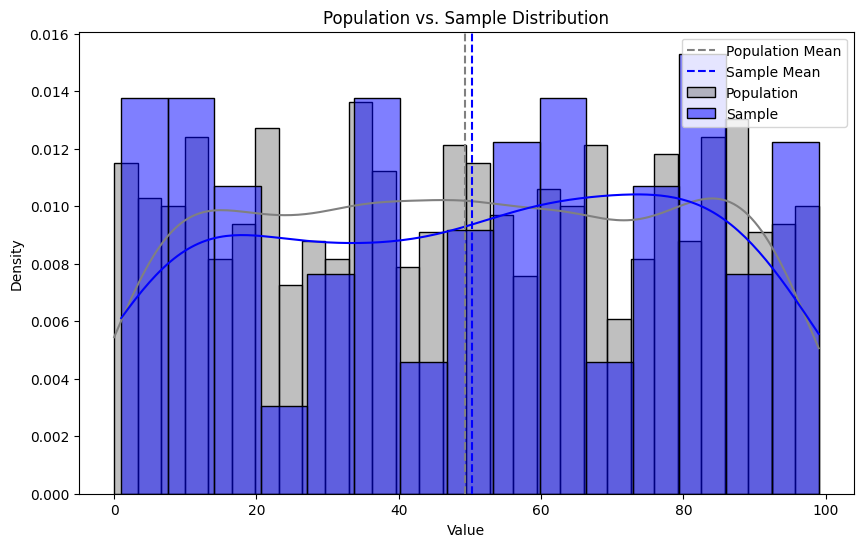

In [19]:
# Plot the population and sample distributions
plt.figure(figsize=(10, 6))
sns.histplot(population, color="gray", label="Population", kde=True, stat="density", bins=30)
sns.histplot(simple_random_sample, color="blue", label="Sample", kde=True, stat="density", bins=15)
plt.axvline(np.mean(population), color='gray', linestyle='dashed', label='Population Mean')
plt.axvline(np.mean(simple_random_sample), color='blue', linestyle='dashed', label='Sample Mean')
plt.title("Population vs. Sample Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

### Summary

- **Simple Random Sampling**: Each element in the population has an equal chance of being selected.
- **Stratified Sampling**: Ensures proportional representation from subgroups in the sample.
- **Systematic Sampling**: Samples data at regular intervals.
- **Cluster Sampling**: Samples entire clusters or groups from the population.
- **Reservoir Sampling**: Suitable for sampling from a large or streaming dataset.
- **Bootstrap Sampling**: Sampling with replacement for statistical estimation.

Each method is useful for different types of analysis depending on the structure of the population and the goals of the study. This tutorial shows how to implement each of these techniques using Python's `numpy` and `pandas` libraries.
